In [1]:
from __future__ import print_function # to use Python 3 features
%matplotlib inline
from matplotlib import pyplot as plt

# for prettier plots; you can comment this out if you don't have seaborn
import seaborn as sns; sns.set(context="poster")


import numpy as np

# Activity description
See: https://docs.google.com/document/d/1COdCXs4K6kAXLcVvYxG3fqS53l2gzbkDvbbTmm8ZF1U/edit?usp=sharing

# Example generation of random samples

In [2]:
poisson_samples = np.random.poisson(lam=1.5, size=20)
print(poisson_samples)

[1 0 1 0 1 0 2 2 1 2 0 2 2 0 3 0 0 2 2 1]


In [3]:
gaussian_samples = np.random.normal(loc=-5.0, scale=2.0, size=20)
print(gaussian_samples)

[-7.02049814 -2.30045441 -5.13504563 -4.94898767 -4.97587445 -6.24865014
 -6.09541327 -5.42786886 -4.6752383  -2.87273604  1.8438644  -1.51010589
 -3.8991742  -6.51737971 -5.47199126 -3.81987867 -5.406066   -9.64146779
 -6.18682129 -5.45262979]


# Build dictionary to hold samples

In [4]:
def add_samples(dictionary_of_samples, key, samples):
    """ `samples` must be a list! """
    try: 
        dictionary_of_samples[key] += samples
    except KeyError:
        # if entry doesn't exist, create a new one
        dictionary_of_samples[key] = samples

### test `add_samples`
(there are better ways to do testing using libraries like `pytest`, `nose` or `unittest`)

In [5]:
test_dictionary_of_samples = {}

key = "test"
samples = [1,2,3]

add_samples(test_dictionary_of_samples, key, samples)
add_samples(test_dictionary_of_samples, key, samples)

if test_dictionary_of_samples[key] == [1,2,3,1,2,3]:
    print("OK")
else:
    print("Error: add_samples isn't behaving right")

OK


# Activity solution

In [6]:
dictionary_of_samples = {}

N_samples = 10

key = ("gaussian", -5.0, 2.0)
gaussian_samples = list(np.random.normal(loc=key[1], scale=key[2], size=N_samples))
add_samples(dictionary_of_samples, key, gaussian_samples)

key = ("gaussian", 10, 1.0)
gaussian_samples = list(np.random.normal(loc=key[1], scale=key[2], size=N_samples))
add_samples(dictionary_of_samples, key, gaussian_samples)

key = ("poisson", 1.5)
poisson_samples = list(np.random.poisson(lam=key[1], size=N_samples))
add_samples(dictionary_of_samples, key, poisson_samples)

key = ("gaussian", 2.0)
poisson_samples = list(np.random.poisson(lam=key[1], size=N_samples))
add_samples(dictionary_of_samples, key, poisson_samples)


In [7]:
dictionary_of_samples

{('gaussian', -5.0, 2.0): [-5.664832581630364,
  -0.86705427937108492,
  -2.1304259120228703,
  -6.5890589492496208,
  -3.9365609502839374,
  -8.1489284530513046,
  -2.2601714391819661,
  -6.2980796732950211,
  -4.2202247550204568,
  -5.3243016989966652],
 ('gaussian', 2.0): [0, 2, 2, 4, 1, 2, 2, 2, 1, 2],
 ('gaussian', 10, 1.0): [9.0932110082918811,
  9.7976703917524848,
  10.906142587917998,
  10.301445974014733,
  10.088106816950573,
  10.092547155526415,
  10.025715586921438,
  9.8709380990377138,
  9.909459545176464,
  11.104405060037985],
 ('poisson', 1.5): [5, 2, 0, 5, 1, 1, 1, 1, 2, 1]}

# SDSS extension

In [8]:
from astroML import datasets
data = datasets.fetch_sdss_corrected_spectra()

In [9]:
# columns available within the data structure
data.keys()

['lineindex_cln',
 'mask',
 'coeff0',
 'z',
 'zerr',
 'spec_cln',
 'log_NII_Ha',
 'evecs',
 'coeffs',
 'spectra',
 'mu',
 'norms',
 'log_OIII_Hb',
 'evals',
 'coeff1']

In [10]:
def separate_redshifts_of_galaxies(data):
    """
    Filters the SDSS data, into two lists of redshifts:
    one for star formation dominated galaxies and one for AGN-dominated galaxies
    
    Parameters
    ----------
    data : npz file
        Must be the data structure returned from fetch_sdss_corrected_spectra()
    
    Returns
    -------
    star_formation_dominated_redshifts : list
    agn_dominated_redshifts : list
    
    """
    
    star_formation_dominated = (data["lineindex_cln"] == 4)
    agn_dominated            = (data["lineindex_cln"] == 5)
    
    star_formation_dominated_redshifts = list(data["z"][star_formation_dominated] )
    agn_dominated_redshifts            = list(data["z"][agn_dominated] )
    
    return star_formation_dominated_redshifts, agn_dominated_redshifts
    
star_formation_dominated_redshifts, agn_dominated_redshifts = separate_redshifts_of_galaxies(data)

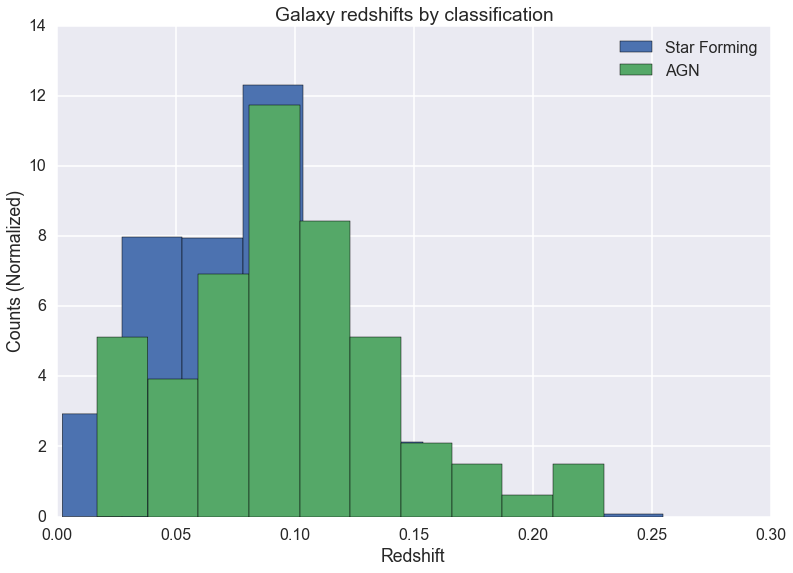

In [11]:
plt.hist(star_formation_dominated_redshifts, 
         normed=True, label="Star Forming")
plt.hist(agn_dominated_redshifts, 
         normed=True, label="AGN")

plt.title("Galaxy redshifts by classification")
plt.xlabel("Redshift")
plt.ylabel("Counts (Normalized)")
plt.legend(loc="best")
